# Hackathon : Données de santé

- Peut-on établir un lien entre la densité de médecins par spécialité  et par territoire et la pratique du dépassement d'honoraires ? 
- Est-ce  dans les territoires où la densité est la plus forte que les médecins  pratiquent le moins les dépassement d'honoraires ? 
- Est ce que la densité de certains médecins / praticiens est corrélé à la densité de population pour certaines classes d'ages (bebe/pediatre, personnes agées / infirmiers etc...) ?

Sources de données et liens utiles :
- *Hackathon Etalab* https://www.etalab.gouv.fr/retour-sur-le-premier-hackathon-donnees-de-sante
- *GitHub Etalab* https://github.com/SGMAP-AGD/densite_medecins
- *Démographie des médecins* http://www.data.drees.sante.gouv.fr/ReportFolders/reportFolders.aspx?IF_ActivePath=P,490,497,514
- *Dépassement d'honoraires* https://www.data.gouv.fr/fr/datasets/honoraires-des-professionnels-de-sante-liberaux/
- *Wiki Hackathon" https://github.com/SGMAP-AGD/DAMIR/wiki

Approche : 
- Explorer les données de la répartition géographique des médecins en France et des spécialités. 
- Explorer les données de dépassement d'honoraire par région et par spécialité.
- Explorer la densité de population par tranche d'âge, et les spécialiséts reliés par région

In [206]:
#Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. Chargement des données

### a. Données sur les Honoraires

In [207]:
honoraires = pd.read_excel("Honoraires_totaux_des_professionnels_de_sante_par_departement_en_2016.xls", sheet_name = "Spécialistes", na_values="nc")

In [208]:
honoraires.isnull().sum()

Spécialistes                              0
DEPARTEMENT                               0
EFFECTIFS                                 0
HONORAIRES SANS DEPASSEMENT (Euros)    2299
DEPASSEMENTS (Euros)                   2299
FRAIS DE DEPLACEMENT (Euros)           2299
TOTAL DES HONORAIRES (Euros)           2299
dtype: int64

In [209]:
honoraires.DEPARTEMENT.value_counts()

28- Eure-et-Loir               53
42- Loire                      53
69- Rhône                      53
64- Pyrénées-Atlantiques       53
08- Ardennes                   53
30- Gard                       53
76- Seine-Maritime             53
78- Yvelines                   53
63- Puy-de-Dôme                53
17- Charente-Maritime          53
18- Cher                       53
35- Ille-et-Vilaine            53
45- Loiret                     53
2B- Haute-Corse                53
02- Aisne                      53
49- Maine-et-Loire             53
10- Aube                       53
66- Pyrénées-Orientales        53
44- Loire-Atlantique           53
31- Haute-Garonne              53
03- Allier                     53
88- Vosges                     53
59- Nord                       53
11- Aude                       53
36- Indre                      53
91- Essonne                    53
43- Haute-Loire                53
21- Côte-d'Or                  53
53- Mayenne                    53
51- Marne     

In [210]:
honoraires = honoraires[~honoraires['DEPARTEMENT'].str.contains("TOTAL")]

In [211]:
honoraires.DEPARTEMENT.value_counts()

28- Eure-et-Loir            53
2B- Haute-Corse             53
64- Pyrénées-Atlantiques    53
08- Ardennes                53
30- Gard                    53
76- Seine-Maritime          53
78- Yvelines                53
63- Puy-de-Dôme             53
17- Charente-Maritime       53
18- Cher                    53
35- Ille-et-Vilaine         53
45- Loiret                  53
02- Aisne                   53
89- Yonne                   53
49- Maine-et-Loire          53
10- Aube                    53
66- Pyrénées-Orientales     53
44- Loire-Atlantique        53
31- Haute-Garonne           53
03- Allier                  53
88- Vosges                  53
59- Nord                    53
11- Aude                    53
36- Indre                   53
69- Rhône                   53
91- Essonne                 53
43- Haute-Loire             53
21- Côte-d'Or               53
51- Marne                   53
974- Réunion                53
                            ..
61- Orne                    53
58- Nièv

In [212]:
#honoraires['NumDepartement'] = honoraires['DEPARTEMENT'].apply(lambda x : np.array(re.findall(r'\d+', x)).sum)
honoraires['NumDepartement'] = honoraires['DEPARTEMENT'].str.extract('(\d+)').astype(int)
honoraires = honoraires.drop(honoraires.index[[19,20]])
honoraires

,Spécialistes,DEPARTEMENT,EFFECTIFS,HONORAIRES SANS DEPASSEMENT (Euros),DEPASSEMENTS (Euros),FRAIS DE DEPLACEMENT (Euros),TOTAL DES HONORAIRES (Euros),NumDepartement
0,02- Anesthésie-réanimation chirurgicale,01- Ain,17,4.530079e+06,2.496180e+06,0.00,7.026260e+06,1
1,02- Anesthésie-réanimation chirurgicale,02- Aisne,19,4.985260e+06,3.738376e+05,0.00,5.359097e+06,2
2,02- Anesthésie-réanimation chirurgicale,03- Allier,19,5.102902e+06,5.609786e+05,0.00,5.663880e+06,3
3,02- Anesthésie-réanimation chirurgicale,04- Alpes-Hte-Provence,4,NaN,NaN,NaN,NaN,4
4,02- Anesthésie-réanimation chirurgicale,05- Hautes-Alpes,5,NaN,NaN,NaN,NaN,5
5,02- Anesthésie-réanimation chirurgicale,06- Alpes-Maritimes,110,2.485377e+07,1.081635e+07,0.00,3.567012e+07,6
6,02- Anesthésie-réanimation chirurgicale,07- Ardèche,23,5.271245e+06,8.025420e+05,0.00,6.073787e+06,7
7,02- Anesthésie-réanimation chirurgicale,08- Ardennes,6,NaN,NaN,NaN,NaN,8
8,02- Anesthésie-réanimation chirurgicale,09- Ariège,0,0.000000e+00,0.000000e+00,0.00,0.000000e+00,9
9,02- Anesthésie-réanimation chirurgicale,10- Aube,12,3.693625e+06,9.543920e+03,0.00,3.703169e+06,10


In [213]:
hon_spe = pd.DataFrame(honoraires.groupby(['Spécialistes'])['EFFECTIFS','HONORAIRES SANS DEPASSEMENT (Euros)','DEPASSEMENTS (Euros)', 'FRAIS DE DEPLACEMENT (Euros)', 'TOTAL DES HONORAIRES (Euros)'].mean())
hon_spe = hon_spe[~hon_spe.index.str.contains("TOTAL")]
print(hon_spe.sort_values(by="TOTAL DES HONORAIRES (Euros)"))

                                                    EFFECTIFS  \
Spécialistes                                                    
44- Chirurgie maxillo-faciale                        0.584158   
43- Chirurgie infantile                              1.029703   
78- Médecine génétique                               0.089109   
34-Gériatrie                                         0.702970   
77- Obstétrique                                      0.188119   
71- Hématologie                                      0.396040   
20- Réanimation médicale                             0.237624   
75- Psychiatrie de l'enfant et de l'adolescent       0.891089   
17- Neuropsychiatrie                                 1.316832   
73- Oncologie médicale                               2.019802   
76- Radiothérapie                                    1.227723   
09- Médecine interne                                 2.841584   
47- Chirurgie thoracique et cardio-vasculaire        2.415842   
10- Neurochirurgie       

In [214]:
hon_reg = pd.DataFrame(honoraires.groupby(['DEPARTEMENT'])['EFFECTIFS','HONORAIRES SANS DEPASSEMENT (Euros)','DEPASSEMENTS (Euros)', 'FRAIS DE DEPLACEMENT (Euros)', 'TOTAL DES HONORAIRES (Euros)'].mean())
hon_reg = hon_reg[~hon_reg.index.str.contains("TOTAL")]

print(hon_reg.sort_values(by="TOTAL DES HONORAIRES (Euros)"))

                           EFFECTIFS  HONORAIRES SANS DEPASSEMENT (Euros)  \
DEPARTEMENT                                                                 
976- Mayotte                0.716981                         1.308259e+05   
48- Lozère                  3.301887                         8.405594e+05   
23- Creuse                  4.641509                         9.478871e+05   
09- Ariège                  7.245283                         1.619892e+06   
973- Guyane                 5.830189                         1.916365e+06   
46- Lot                     8.075472                         2.007575e+06   
90- Terr. de Belfort        8.000000                         2.411793e+06   
05- Hautes-Alpes           10.037736                         2.508572e+06   
55- Meuse                   7.716981                         2.454284e+06   
43- Haute-Loire             9.037736                         2.591902e+06   
32- Gers                    8.547170                         2.994213e+06   

### b. Données sur la population

In [215]:
population = pd.DataFrame(pd.read_excel("estim-pop-dep-sexe-gca-1975-2018.xls", sheet_name = "2016", na_values="nan"))

In [216]:
index = ['NumDepartement','Departement', 'T : 0-19', 'T : 20-39','T : 40-59','T : 60-74','T : 75-100','T Total', 'H : 0-19', 'H : 20-39','H : 40-59','H : 60-74','H : 75-100','H Total','F : 0-19', 'F : 20-39','F : 40-59','F : 60-74','F : 75-100', 'F Total']
population = population.drop([0,1,2,3], axis=0)
population.columns = index
#population.reset_index()
population['NumDepartement'].astype(str)
#population = population[population.applymap(.isnumeric()).any(1)]

#population[pd.to_numeric(population['NumDepartement'], errors='coerce').notnull()]

#population[~population.NumDepartement.str.contains("2A", na=False)]
#population[~population.NumDepartement.str.contains("2B", na=False)]
#population[~population.NumDepartement.str.contains("France métropolitaine ", na=False)]
#population[~population.NumDepartement.str.contains("DOM", na=False)]

population.head()
#.extract('(\d+)').astype(int)

,NumDepartement,Departement,T : 0-19,T : 20-39,T : 40-59,T : 60-74,T : 75-100,T Total,H : 0-19,H : 20-39,H : 40-59,H : 60-74,H : 75-100,H Total,F : 0-19,F : 20-39,F : 40-59,F : 60-74,F : 75-100,F Total
4,01,Ain,167021,147968,177879,94794,50205,637867,85701,74232,88712,46157,19966,314768,81320,73736,89167,48637,30239,323099
5,02,Aisne,136884,118130,144590,89115,48704,537423,69972,59041,71769,42779,17841,261402,66912,59089,72821,46336,30863,276021
6,03,Allier,71186,64721,92025,68089,44764,340785,36354,32647,45208,32178,17008,163395,34832,32074,46817,35911,27756,177390
7,04,Alpes-de-Haute-Provence,34812,30191,44532,32653,19626,161814,18113,15040,21758,15916,7957,78784,16699,15151,22774,16737,11669,83030
8,05,Hautes-Alpes,31451,28715,39451,26042,15538,141197,16068,14469,19616,12678,6250,69081,15383,14246,19835,13364,9288,72116


In [217]:
#population = population[~population['NumDepartement'].str.contains(['France', 'DOM', 'nan'])]

In [218]:
population = population.drop(['Departement'], axis=1)

In [219]:
#population.loc[population['NumDepartement'].str.contains('A'), 'NumDepartement'] = 2000
population['NumDepartement']

4                                                     01
5                                                     02
6                                                     03
7                                                     04
8                                                     05
9                                                     06
10                                                    07
11                                                    08
12                                                    09
13                                                    10
14                                                    11
15                                                    12
16                                                    13
17                                                    14
18                                                    15
19                                                    16
20                                                    17
21                             

In [220]:
population = population.drop([23,24,100,106,107,108,109])

In [221]:
population.dtypes

NumDepartement    object
T : 0-19          object
T : 20-39         object
T : 40-59         object
T : 60-74         object
T : 75-100        object
T Total           object
H : 0-19          object
H : 20-39         object
H : 40-59         object
H : 60-74         object
H : 75-100        object
H Total           object
F : 0-19          object
F : 20-39         object
F : 40-59         object
F : 60-74         object
F : 75-100        object
F Total           object
dtype: object

In [222]:
population = population.astype('int64')

### c. Concatenation des données

In [223]:
df = pd.merge(population, honoraires)

In [224]:
df.head(200)

,NumDepartement,T : 0-19,T : 20-39,T : 40-59,T : 60-74,T : 75-100,T Total,H : 0-19,H : 20-39,H : 40-59,...,F : 60-74,F : 75-100,F Total,Spécialistes,DEPARTEMENT,EFFECTIFS,HONORAIRES SANS DEPASSEMENT (Euros),DEPASSEMENTS (Euros),FRAIS DE DEPLACEMENT (Euros),TOTAL DES HONORAIRES (Euros)
0,1,167021,147968,177879,94794,50205,637867,85701,74232,88712,...,48637,30239,323099,02- Anesthésie-réanimation chirurgicale,01- Ain,17,4530079.33,2496180.45,0.00,7026259.78
1,1,167021,147968,177879,94794,50205,637867,85701,74232,88712,...,48637,30239,323099,20- Réanimation médicale,01- Ain,0,0.00,0.00,0.00,0.00
2,1,167021,147968,177879,94794,50205,637867,85701,74232,88712,...,48637,30239,323099,"TOTAL ANESTHESIE REANIMATION (02, 20)",01- Ain,17,4530079.33,2496180.45,0.00,7026259.78
3,1,167021,147968,177879,94794,50205,637867,85701,74232,88712,...,48637,30239,323099,03- Pathologie cardio-vasculaire,01- Ain,20,6048363.47,252877.05,0.00,6301240.52
4,1,167021,147968,177879,94794,50205,637867,85701,74232,88712,...,48637,30239,323099,43- Chirurgie infantile,01- Ain,0,0.00,0.00,0.00,0.00
5,1,167021,147968,177879,94794,50205,637867,85701,74232,88712,...,48637,30239,323099,44- Chirurgie maxillo-faciale,01- Ain,0,0.00,0.00,0.00,0.00
6,1,167021,147968,177879,94794,50205,637867,85701,74232,88712,...,48637,30239,323099,46- Chirurgie plastique reconstructrice et est...,01- Ain,1,NaN,NaN,NaN,NaN
7,1,167021,147968,177879,94794,50205,637867,85701,74232,88712,...,48637,30239,323099,47- Chirurgie thoracique et cardio-vasculaire,01- Ain,0,0.00,0.00,0.00,0.00
8,1,167021,147968,177879,94794,50205,637867,85701,74232,88712,...,48637,30239,323099,48- Chirurgie vasculaire,01- Ain,2,NaN,NaN,NaN,NaN
9,1,167021,147968,177879,94794,50205,637867,85701,74232,88712,...,48637,30239,323099,49- Chirurgie viscérale et digestive,01- Ain,3,NaN,NaN,NaN,NaN


### d. Construction des indicateurs

In [225]:
df['Honoraires/Effectif'] = df['TOTAL DES HONORAIRES (Euros)'] / df['EFFECTIFS']

In [226]:
df['Honoraires/Habitant'] = df['TOTAL DES HONORAIRES (Euros)'] / df['T Total']

In [227]:
df.head()

,NumDepartement,T : 0-19,T : 20-39,T : 40-59,T : 60-74,T : 75-100,T Total,H : 0-19,H : 20-39,H : 40-59,...,F Total,Spécialistes,DEPARTEMENT,EFFECTIFS,HONORAIRES SANS DEPASSEMENT (Euros),DEPASSEMENTS (Euros),FRAIS DE DEPLACEMENT (Euros),TOTAL DES HONORAIRES (Euros),Honoraires/Effectif,Honoraires/Habitant
0,1,167021,147968,177879,94794,50205,637867,85701,74232,88712,...,323099,02- Anesthésie-réanimation chirurgicale,01- Ain,17,4530079.33,2496180.45,0.0,7026259.78,413309.398824,11.015243
1,1,167021,147968,177879,94794,50205,637867,85701,74232,88712,...,323099,20- Réanimation médicale,01- Ain,0,0.00,0.00,0.0,0.00,NaN,0.000000
2,1,167021,147968,177879,94794,50205,637867,85701,74232,88712,...,323099,"TOTAL ANESTHESIE REANIMATION (02, 20)",01- Ain,17,4530079.33,2496180.45,0.0,7026259.78,413309.398824,11.015243
3,1,167021,147968,177879,94794,50205,637867,85701,74232,88712,...,323099,03- Pathologie cardio-vasculaire,01- Ain,20,6048363.47,252877.05,0.0,6301240.52,315062.026000,9.878612
4,1,167021,147968,177879,94794,50205,637867,85701,74232,88712,...,323099,43- Chirurgie infantile,01- Ain,0,0.00,0.00,0.0,0.00,NaN,0.000000


In [228]:
dept=df[['NumDepartement', 'DEPARTEMENT']].drop_duplicates(keep='first')
df.head()

,NumDepartement,T : 0-19,T : 20-39,T : 40-59,T : 60-74,T : 75-100,T Total,H : 0-19,H : 20-39,H : 40-59,...,F Total,Spécialistes,DEPARTEMENT,EFFECTIFS,HONORAIRES SANS DEPASSEMENT (Euros),DEPASSEMENTS (Euros),FRAIS DE DEPLACEMENT (Euros),TOTAL DES HONORAIRES (Euros),Honoraires/Effectif,Honoraires/Habitant
0,1,167021,147968,177879,94794,50205,637867,85701,74232,88712,...,323099,02- Anesthésie-réanimation chirurgicale,01- Ain,17,4530079.33,2496180.45,0.0,7026259.78,413309.398824,11.015243
1,1,167021,147968,177879,94794,50205,637867,85701,74232,88712,...,323099,20- Réanimation médicale,01- Ain,0,0.00,0.00,0.0,0.00,NaN,0.000000
2,1,167021,147968,177879,94794,50205,637867,85701,74232,88712,...,323099,"TOTAL ANESTHESIE REANIMATION (02, 20)",01- Ain,17,4530079.33,2496180.45,0.0,7026259.78,413309.398824,11.015243
3,1,167021,147968,177879,94794,50205,637867,85701,74232,88712,...,323099,03- Pathologie cardio-vasculaire,01- Ain,20,6048363.47,252877.05,0.0,6301240.52,315062.026000,9.878612
4,1,167021,147968,177879,94794,50205,637867,85701,74232,88712,...,323099,43- Chirurgie infantile,01- Ain,0,0.00,0.00,0.0,0.00,NaN,0.000000


In [229]:
dept

,NumDepartement,DEPARTEMENT
0,1,01- Ain
53,2,02- Aisne
55,2,2A- Corse-du-Sud
56,2,2B- Haute-Corse
210,3,03- Allier
263,4,04- Alpes-Hte-Provence
316,5,05- Hautes-Alpes
369,6,06- Alpes-Maritimes
422,7,07- Ardèche
475,8,08- Ardennes


### e. Exploration des données

In [230]:
df = df.fillna(0)

In [231]:
df.columns

Index(['NumDepartement', 'T : 0-19', 'T : 20-39', 'T : 40-59', 'T : 60-74',
       'T : 75-100', 'T Total', 'H : 0-19', 'H : 20-39', 'H : 40-59',
       'H : 60-74', 'H : 75-100', 'H Total', 'F : 0-19', 'F : 20-39',
       'F : 40-59', 'F : 60-74', 'F : 75-100', 'F Total', 'Spécialistes',
       'DEPARTEMENT', 'EFFECTIFS', 'HONORAIRES SANS DEPASSEMENT (Euros)',
       'DEPASSEMENTS (Euros)', 'FRAIS DE DEPLACEMENT (Euros)',
       'TOTAL DES HONORAIRES (Euros)', 'Honoraires/Effectif',
       'Honoraires/Habitant'],
      dtype='object')

In [232]:
df.head()

,NumDepartement,T : 0-19,T : 20-39,T : 40-59,T : 60-74,T : 75-100,T Total,H : 0-19,H : 20-39,H : 40-59,...,F Total,Spécialistes,DEPARTEMENT,EFFECTIFS,HONORAIRES SANS DEPASSEMENT (Euros),DEPASSEMENTS (Euros),FRAIS DE DEPLACEMENT (Euros),TOTAL DES HONORAIRES (Euros),Honoraires/Effectif,Honoraires/Habitant
0,1,167021,147968,177879,94794,50205,637867,85701,74232,88712,...,323099,02- Anesthésie-réanimation chirurgicale,01- Ain,17,4530079.33,2496180.45,0.0,7026259.78,413309.398824,11.015243
1,1,167021,147968,177879,94794,50205,637867,85701,74232,88712,...,323099,20- Réanimation médicale,01- Ain,0,0.00,0.00,0.0,0.00,0.000000,0.000000
2,1,167021,147968,177879,94794,50205,637867,85701,74232,88712,...,323099,"TOTAL ANESTHESIE REANIMATION (02, 20)",01- Ain,17,4530079.33,2496180.45,0.0,7026259.78,413309.398824,11.015243
3,1,167021,147968,177879,94794,50205,637867,85701,74232,88712,...,323099,03- Pathologie cardio-vasculaire,01- Ain,20,6048363.47,252877.05,0.0,6301240.52,315062.026000,9.878612
4,1,167021,147968,177879,94794,50205,637867,85701,74232,88712,...,323099,43- Chirurgie infantile,01- Ain,0,0.00,0.00,0.0,0.00,0.000000,0.000000


In [233]:
df = df.drop(['T : 0-19', 'T : 20-39','T : 40-59','T : 60-74','T : 75-100', 'H : 0-19', 'H : 20-39','H : 40-59','H : 60-74','H : 75-100','H Total','F : 0-19', 'F : 20-39','F : 40-59','F : 60-74','F : 75-100', 'F Total'], axis=1)

In [234]:
df

,NumDepartement,T Total,Spécialistes,DEPARTEMENT,EFFECTIFS,HONORAIRES SANS DEPASSEMENT (Euros),DEPASSEMENTS (Euros),FRAIS DE DEPLACEMENT (Euros),TOTAL DES HONORAIRES (Euros),Honoraires/Effectif,Honoraires/Habitant
0,1,637867,02- Anesthésie-réanimation chirurgicale,01- Ain,17,4530079.33,2496180.45,0.0,7026259.78,413309.398824,11.015243
1,1,637867,20- Réanimation médicale,01- Ain,0,0.00,0.00,0.0,0.00,0.000000,0.000000
2,1,637867,"TOTAL ANESTHESIE REANIMATION (02, 20)",01- Ain,17,4530079.33,2496180.45,0.0,7026259.78,413309.398824,11.015243
3,1,637867,03- Pathologie cardio-vasculaire,01- Ain,20,6048363.47,252877.05,0.0,6301240.52,315062.026000,9.878612
4,1,637867,43- Chirurgie infantile,01- Ain,0,0.00,0.00,0.0,0.00,0.000000,0.000000
5,1,637867,44- Chirurgie maxillo-faciale,01- Ain,0,0.00,0.00,0.0,0.00,0.000000,0.000000
6,1,637867,46- Chirurgie plastique reconstructrice et est...,01- Ain,1,0.00,0.00,0.0,0.00,0.000000,0.000000
7,1,637867,47- Chirurgie thoracique et cardio-vasculaire,01- Ain,0,0.00,0.00,0.0,0.00,0.000000,0.000000
8,1,637867,48- Chirurgie vasculaire,01- Ain,2,0.00,0.00,0.0,0.00,0.000000,0.000000
9,1,637867,49- Chirurgie viscérale et digestive,01- Ain,3,0.00,0.00,0.0,0.00,0.000000,0.000000


In [235]:
df_dept = pd.DataFrame(df.groupby(['NumDepartement'])['TOTAL DES HONORAIRES (Euros)', 'EFFECTIFS','Honoraires/Effectif','Honoraires/Habitant'].sum())

In [236]:
df_dept.replace([np.inf, -np.inf], 0)

,TOTAL DES HONORAIRES (Euros),EFFECTIFS,Honoraires/Effectif,Honoraires/Habitant
NumDepartement,,,,
1,3.017609e+08,1285,4.983823e+06,473.078067
2,6.018636e+08,2706,0.000000e+00,1119.906734
3,2.545957e+08,1076,3.879465e+06,747.085879
4,7.632417e+07,545,6.304324e+05,471.678395
5,6.768637e+07,532,0.000000e+00,479.375422
6,1.640973e+09,7032,8.349860e+06,1516.756666
7,1.978924e+08,942,4.281974e+06,607.261024
8,1.164175e+08,666,2.177644e+06,422.166498
9,4.552255e+07,384,3.233685e+05,298.426316


In [237]:
df_dept['Habitant'] = df_dept['TOTAL DES HONORAIRES (Euros)']/df_dept['Honoraires/Habitant']

In [238]:
df_dept["Superficie"] = [5762,7369,7340,6925,5549,4299,5529, 5229, 4890, 6004, 6139, 8735, 5087, 5548,5726, 5956,6864,7235,5857,8763,6878, 5565, 9060, 5234, 6530, 6040, 5880, 6733, 5853, 6309, 6257, 10725, 6101, 6775, 6791, 6127, 7431, 4999,
9243,
6343,
4781,
4977,
6881,
6775,
5217,
5361,
5167,
7107,
5938,
8162,
6211,
5175,
5246,
6211,
6823,
6216,
6817,
5743,
5860,
6103,
6671,
7970,
7645,
4464,
4116,
4755,
3525,
3249,
5360,
8575,
6206,
6028,
4388,
105,
6278,
5915,
2284,
5999,
6170,
5758,
3718,
5973,
3567,
6720,
6990,
5520,
5874,
7427,
609,
1804,
176,
236,
245,
1246,
162810,
1128,
83534,
2512,
376]

In [242]:
df_dept['DensiteMedecins'] = df_dept['EFFECTIFS']/df_dept['Superficie']

In [243]:
df_dept

,TOTAL DES HONORAIRES (Euros),EFFECTIFS,Honoraires/Effectif,Honoraires/Habitant,Habitant,Superficie,DensiteMedecins
NumDepartement,,,,,,,
1,3.017609e+08,1285,4.983823e+06,473.078067,637867.0,5762,0.223013
2,6.018636e+08,2706,inf,1119.906734,537423.0,7369,0.367214
3,2.545957e+08,1076,3.879465e+06,747.085879,340785.0,7340,0.146594
4,7.632417e+07,545,6.304324e+05,471.678395,161814.0,6925,0.078700
5,6.768637e+07,532,inf,479.375422,141197.0,5549,0.095873
6,1.640973e+09,7032,8.349860e+06,1516.756666,1081896.0,4299,1.635729
7,1.978924e+08,942,4.281974e+06,607.261024,325877.0,5529,0.170374
8,1.164175e+08,666,2.177644e+06,422.166498,275762.0,5229,0.127367
9,4.552255e+07,384,3.233685e+05,298.426316,152542.0,4890,0.078528


In [244]:
#Drop outlier
q = df_dept["DensiteMedecins"].quantile(0.95)

In [245]:
df_dept = df_dept[df_dept["DensiteMedecins"] < q]

In [246]:
df_dept.corr()

,TOTAL DES HONORAIRES (Euros),EFFECTIFS,Honoraires/Effectif,Honoraires/Habitant,Habitant,Superficie,DensiteMedecins
TOTAL DES HONORAIRES (Euros),1.000000,0.991277,0.875747,0.767423,0.954264,-0.081568,0.778760
EFFECTIFS,0.991277,1.000000,0.836025,0.762602,0.926115,-0.079201,0.761225
Honoraires/Effectif,0.875747,0.836025,1.000000,0.844562,0.887129,-0.079427,0.688920
Honoraires/Habitant,0.767423,0.762602,0.844562,1.000000,0.638926,-0.072181,0.570571
Habitant,0.954264,0.926115,0.887129,0.638926,1.000000,-0.080196,0.757251
Superficie,-0.081568,-0.079201,-0.079427,-0.072181,-0.080196,1.000000,-0.155114
DensiteMedecins,0.778760,0.761225,0.688920,0.570571,0.757251,-0.155114,1.000000


Text(0, 0.5, 'Densité de médecins')

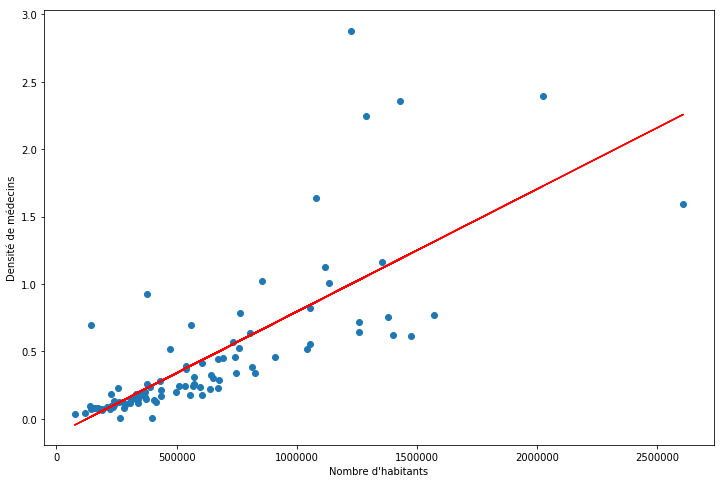

In [252]:
from numpy.polynomial.polynomial import polyfit
b, m = polyfit(df_dept['Habitant'], df_dept['DensiteMedecins'], 1)
plt.figure(figsize=(12,8))
plt.scatter(df_dept['Habitant'], df_dept['DensiteMedecins'])
plt.plot(df_dept['Habitant'], b + m * df_dept['Habitant'], '-', color='r')
plt.xlabel("Nombre d'habitants")
plt.ylabel("Densité de médecins")

Text(0, 0.5, 'Densité de médecins')

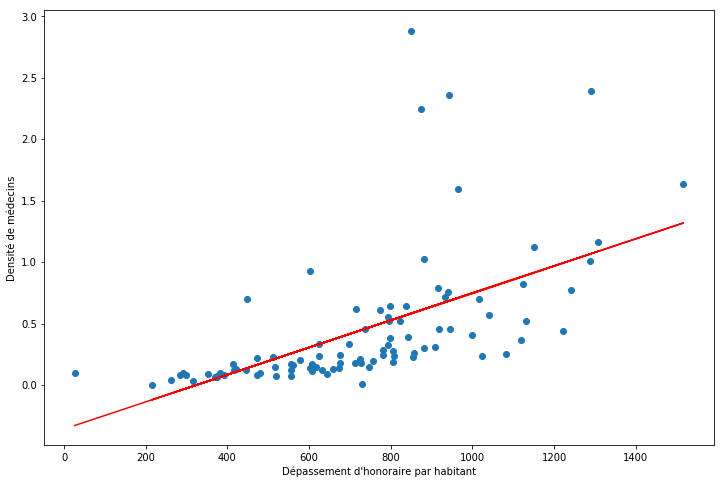

In [253]:
b, m = polyfit(df_dept['Honoraires/Habitant'], df_dept['DensiteMedecins'], 1)
plt.figure(figsize=(12,8))
plt.scatter(df_dept['Honoraires/Habitant'], df_dept['DensiteMedecins'])
plt.plot(df_dept['Honoraires/Habitant'], b + m * df_dept['Honoraires/Habitant'], '-', color='r')
plt.xlabel("Dépassement d'honoraire par habitant")
plt.ylabel("Densité de médecins")